## Lab: Random Projection
In the previous video, you saw an example of working with some MNIST digits data.  A link to the dataset can be found here: http://yann.lecun.com/exdb/mnist/.

First, let's import the necessary libraries.  Notice, there are also some imports from a file called `helper_functions`, which contains the functions used in the previous video.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import fit_random_forest_classifier, plot_rp, show_images_by_digit

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### I. Use random projection to reduce dimensions

In the first section, we will use sparse random projection to transform data from high dimensions to low dimensions and compare the classification accuracy before and after transformation.

`1.` Use pandas to read in the dataset, which can be found at the following address **'./data/train.csv'**.  Take a look at info about the data using `head`, `tail`, `describe`, `info`, etc.  You can learn more about the data values from the article here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm.

In [9]:
# Load the data

train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` Create a vector called **y** that holds the **label** column of the dataset.  Store all other columns holding the pixel data of your images in **X**.

In [10]:
# Save the labels to a Pandas series target

y = train["label"]

# Drop the label feature
X = train.drop("label", axis = 1)


`3.` Now use the `show_images_by_digit` function from the `helper_functions` module to take a look some of the `1`'s, `2`'s, `3`'s, or any other value you are interested in looking at.  Do they all look like what you would expect?

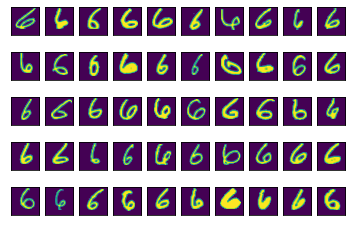

In [11]:
show_images_by_digit(6) # Try looking at a few other digits

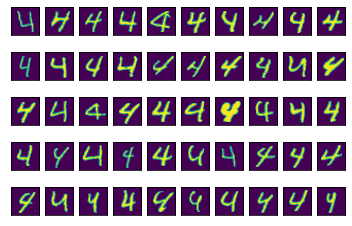

In [12]:
show_images_by_digit(4)

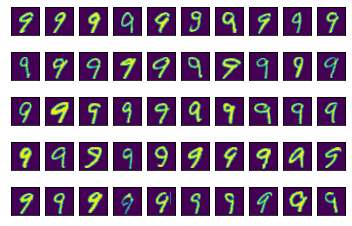

In [13]:
show_images_by_digit(9)

`4.` Now that you have had a chance to look through some of the data, you can try some different algorithms to see what works well to use the X matrix to predict the response well.  If you would like to use the imported random forests classification, you can run the code below, but you might also try any of the supervised techniques you learned in the previous course to see what works best.

If you decide to put together your own classifier, remember the 4 steps to this process:

**I.** Instantiate your model. (with all the hyperparameter values you care about)

**II.** Fit your model. (to the training data)

**III.** Predict using your fitted model.  (on the test data)

**IV.** Score your model. (comparing the predictions to the actual values on the test data)

You can also try a grid search to see if you can improve on your initial predictions.

In [14]:
fit_random_forest_classifier(X, y)

[[201   0   1   0   0   0   7   0   0   0]
 [  0 236   1   0   0   0   1   2   3   0]
 [  2   4 213   0   2   2   1   4   0   0]
 [  2   0   6 174   0   6   0   1   1   1]
 [  0   0   1   0 169   0   3   0   0   5]
 [  2   2   0   6   1 170   3   0   2   0]
 [  2   0   0   0   0   2 207   0   0   0]
 [  0   0   7   2   4   0   0 206   1   5]
 [  0   2   1   7   0   1   0   0 188   3]
 [  2   0   0   3  13   1   0   1   5 183]]
0.9356078808265257


0.9356078808265257

`5.` Now the purpose of this lesson, to look at Randome Projection. In the cell below, reduce the dimension of the training data X using the `SparseRandomProjection` in `random_projection` module. You can use `0.5` as the value of `epsilon`. Store your variables in **rp** and **X_rp**

In [25]:
# TODO: performs random projection to reduce the dataset dimension. 
# To start, use 0.5 as the epsilon value.

from sklearn import random_projection

rp = random_projection.SparseRandomProjection(eps = 0.7)

X_rp = rp.fit_transform(X)


To look at the dimension of the transformed data, you can use the `n_components_` attributes.

In [26]:
rp_dim = rp.n_components_
X_dim = X.shape[1]
print("The orignial data has {} dimensions and it is reduced to {} after random projection.".format(X_dim, rp_dim))

The orignial data has 784 dimensions and it is reduced to 267 after random projection.


`6.` The **X_rp** has moved about half the original features. Use the space below to fit a model using these two features to predict the written value.  You can use the random forest model by running `fit_random_forest_classifier` the same way as in the video. How well does it perform?

In [27]:
# Todo: fit the new data with a classifier
fit_random_forest_classifier(X_rp, y)

[[193   0   1   0   2   1   9   0   3   0]
 [  0 234   1   1   0   1   2   2   2   0]
 [  1   4 208   0   4   0   2   5   3   1]
 [  2   0   8 169   0   5   2   0   3   2]
 [  0   0   2   0 164   0   3   0   1   8]
 [  3   1   3  10   1 159   4   0   2   3]
 [  2   0   3   0   0   2 204   0   0   0]
 [  1   2   5   1   4   0   0 197   7   8]
 [  2   1   5  14   1   3   1   2 171   2]
 [  1   0   2   2  10   3   0   8   1 181]]
0.9034118212397886


0.9034118212397886

`8.`  Epsilon is the level of errors that determins how much the transformed data is distorded from the original data. Now, see if you can change the epsilon to reduce the dimension even more. What is the accuracy of the classifying model?

In [30]:
# TODO: write a loop to transform X using different epsilons and get the accuracy score of classification

stop_value = 0.9
step_value = 0.1

for sample_eps in np.arange(0.5, stop_value, step_value):
    rp = random_projection.SparseRandomProjection(eps = sample_eps)
    X_rp = rp.fit_transform(X)
    y_pred = fit_random_forest_classifier(X_rp, y)
    acc = y_pred
    print("With epsilon = {:.2f}, the transformed data has {} components, a random forest acheived an accuracy of {}.".format(sample_eps, X_rp.shape[1], acc))

[[192   0   2   0   2   3   9   0   1   0]
 [  0 233   1   1   0   1   2   1   4   0]
 [  4   5 207   1   2   0   2   5   2   0]
 [  0   0   9 167   0   7   0   1   5   2]
 [  0   0   2   0 168   0   2   0   0   6]
 [  1   1   3   6   2 168   2   0   2   1]
 [  3   0   2   0   1   2 201   1   1   0]
 [  1   2   7   0   5   0   0 202   5   3]
 [  1   1   3   5   2   8   2   1 177   2]
 [  2   0   0   2  16   1   0   7   6 174]]
0.9077366650648726
With epsilon = 0.50, the transformed data has 419 components, a random forest acheived an accuracy of 0.9077366650648726.
[[197   0   1   0   0   2   7   0   1   1]
 [  0 234   3   0   0   1   1   2   2   0]
 [  4   5 209   1   3   0   1   3   1   1]
 [  2   0   8 168   0   7   2   1   2   1]
 [  1   0   0   0 167   0   3   1   0   6]
 [  1   1   2   9   3 164   3   1   0   2]
 [  2   0   1   0   3   3 201   1   0   0]
 [  1   2   3   1   5   0   0 202   2   9]
 [  5   2   4  10   3   3   1   2 172   0]
 [  2   1   1   3  14   0   0  11   2 174

`9.` As you can see, the accuracy is still very high after recuding more than half of the columns. `epsilon` is an important parameter in the *the [Johnson-Lindenstrauss lemma](https://en.wikipedia.org/wiki/Johnson%E2%80%93Lindenstrauss_lemma)*. Let's see how epsilon changes the number of components projected and you will notice that a **higer** value of epsilon gives you a dataset with **lower** number of components.

In [31]:
# Calulate the number of components with varying eps
from sklearn.random_projection import johnson_lindenstrauss_min_dim
eps = np.arange(0.1, 1, 0.01)
n_comp = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=eps)

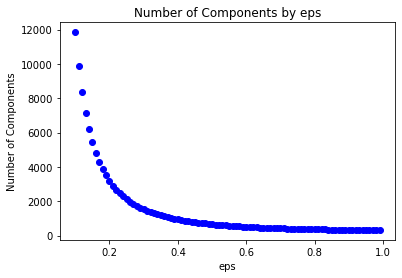

In [32]:
plt.plot(eps, n_comp, 'bo');
plt.xlabel('eps');
plt.ylabel('Number of Components');
plt.title('Number of Components by eps');

### II. Visualize the random projection

In this section, we will take a look at how the projection works.

`1.` We load the number of samples and number of components in the original data **X**. Store them in `X_sample` and `X_comp`.

In [43]:
# TODO: find the number of samples and components in X

X_sample = len(X)
X_comp = len(X.columns)

print("The orignial data has {} samples with dimension {}.".format(X_sample, X_comp))

The orignial data has 6304 samples with dimension 784.


`2.` Project the data onto a space with `n_components` using `SparseRamdomProjection`. Sometimes you may want to define the dimension of projected space directly without guessing it based on the epsilon.
In random projection, besides using a predefine an epsilon to determine the dimension, you can also use the `n_components` parameter to define the number of components in the transformed data.

In [44]:
# TODO: define a n_components and perform random projection on data X.
# Store the transformed data in a `X_rp` variable
n_components = 11

rp = random_projection.SparseRandomProjection(n_components = n_components)

X_rp = rp.fit_transform(X)


`3.` Perform the following helper function to plot two figures. 

The first figure shows how the distribution of pairwise distance of original data against that of the projected data. 

The second figure shows the ratio of pairwise distance in projected data and original data (projected distance/original distance)

It may take about 2-5 min to plot the figures due to the large data dimension.

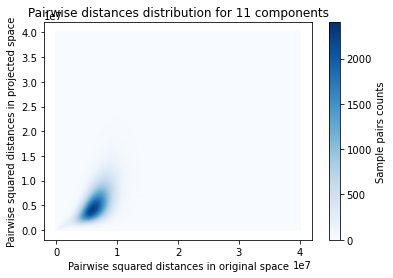

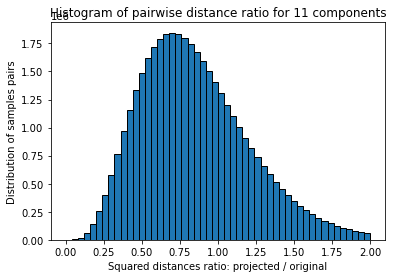

In [45]:
plot_rp(X, X_rp, n_components)

`4.` Change number of `n_components` to 30, 100, 700. What do you observe?

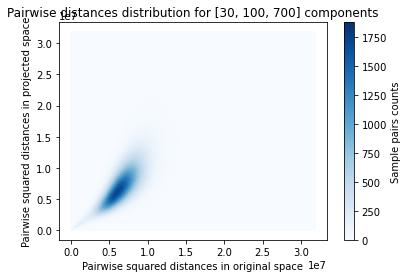

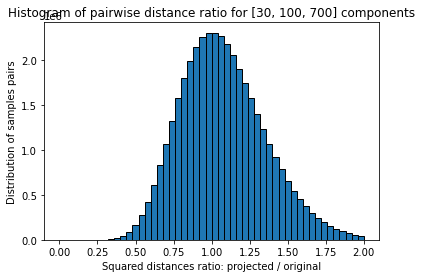

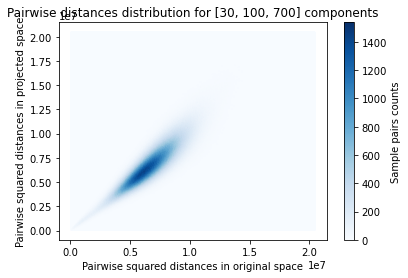

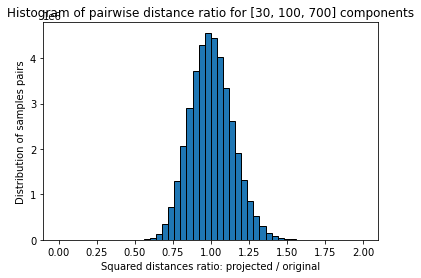

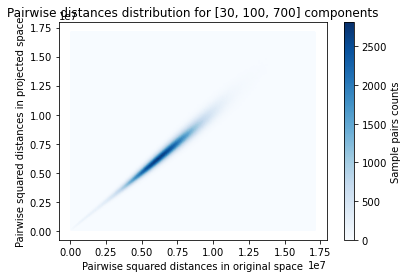

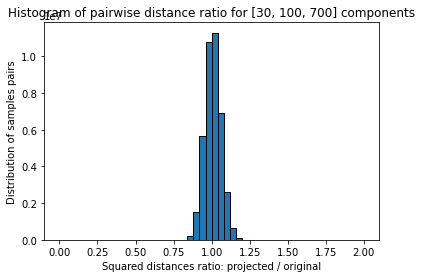

In [48]:

n_components = [30, 100, 700]

for components in n_components:

    rp = random_projection.SparseRandomProjection(n_components = components)
    X_rp = rp.fit_transform(X)
    plot_rp(X, X_rp, n_components)



It is clearly observed that the more dimensions are maintained, the more the paiwise ratio resembles a normal distribution.